<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_October2023/blob/main/ML_Final_Project_Arquimedes_November_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The RAPIDS data science framework is a collection of libraries for running end-to-end data science pipelines completely on the GPU.

The interaction is designed to have a familiar look and feel to working in Python, but utilizes optimized NVIDIA® CUDA® primitives and high-bandwidth GPU memory under the hood.

In [1]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 874.00 KiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Bases de datos COVID 19 en México

Información del Sistema de Vigilancia Epidemiológica de Enfermedades Respiratoria Viral, que informan las 475 unidades monitoras de enfermedad respiratoria viral (USMER) en todo el país de todo el sector salud (IMSS, ISSSTE, SEDENA, SEMAR, ETC).

Data file in zip format:
https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip

Data Dictionary with the catalogs for each variable:
https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip


In [5]:
#  Obtaining zip file from url
!wget https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip

--2023-11-06 18:27:53--  https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip
Resolving datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)... 201.98.60.146
Connecting to datosabiertos.salud.gob.mx (datosabiertos.salud.gob.mx)|201.98.60.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17989229 (17M) [application/x-zip-compressed]
Saving to: ‘datos_abiertos_covid19.zip.1’

datos_abiertos_covi 100%[===================>]  17.16M  9.13MB/s    in 1.9s    

2023-11-06 18:27:55 (9.13 MB/s) - ‘datos_abiertos_covid19.zip.1’ saved [17989229/17989229]



In [6]:
#  Unzipping file
!unzip /content/datos_abiertos_covid19.zip

Archive:  /content/datos_abiertos_covid19.zip
replace COVID19MEXICO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: COVID19MEXICO.csv       


In [7]:
#  Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Creating a dataframe with the data in the file
data=pd.read_csv('COVID19MEXICO.csv',low_memory=False)

### Exploratory Data Analysis (EDA)

It is important to review the variables in the dataset to determine:
  - if any change on variable type is required
  - detect any suspect data anomalies (outliers)
  - identify if the variable information could be related with the desired output
  - eliminate any variables without enough useful information (most data labled as unknown)
  -  identify any significant correlation between variables

#### Checking Variable Type

In [8]:
#  Reviewing variable types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183124 entries, 0 to 1183123
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   FECHA_ACTUALIZACION    1183124 non-null  object
 1   ID_REGISTRO            1183124 non-null  object
 2   ORIGEN                 1183124 non-null  int64 
 3   SECTOR                 1183124 non-null  int64 
 4   ENTIDAD_UM             1183124 non-null  int64 
 5   SEXO                   1183124 non-null  int64 
 6   ENTIDAD_NAC            1183124 non-null  int64 
 7   ENTIDAD_RES            1183124 non-null  int64 
 8   MUNICIPIO_RES          1183124 non-null  int64 
 9   TIPO_PACIENTE          1183124 non-null  int64 
 10  FECHA_INGRESO          1183124 non-null  object
 11  FECHA_SINTOMAS         1183124 non-null  object
 12  FECHA_DEF              1183124 non-null  object
 13  INTUBADO               1183124 non-null  int64 
 14  NEUMONIA               1183124 non

There are 39 variables in the dataset.

 Almost all variables are identified as type *int64*, except for *FECHA_ACTUALIZACION*, *ID_REGISTRO*, *FECHA_INGRESO*, *FECHA_SINTOMAS*, *FECHA_DEF*, *PAIS_NACIONALIDAD* and *PAIS_ORIGEN* which are currently identified as *object* type.

 A change on all date related variables to *date* type will be required.

 The variables *PAIS_NACIONALIDAD* and *PAIS_ORIGEN* need to be changed to *string* type.

### Numeric Variables Evaluation

By using the *describe* and *hist* methods, the distribution of data in the numeric variables can be explored.

In [9]:
data.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,UCI
count,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,...,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06,1.183124e+06
mean,1.694722e+00,7.027458e+00,1.452812e+01,1.411530e+00,1.533708e+01,1.470624e+01,3.854928e+01,1.082183e+00,8.920844e+01,2.442517e+00,...,2.075936e+00,2.050875e+00,3.403921e+00,1.807905e+00,7.873801e+01,1.142679e+00,1.522412e+01,5.484372e+00,9.866152e+01,8.920923e+01
std,4.605254e-01,3.830328e+00,7.795948e+00,4.921110e-01,9.502904e+00,7.760207e+00,7.502269e+01,2.746439e-01,2.607466e+01,6.767127e+00,...,2.894701e+00,2.971961e+00,1.214463e+01,3.939474e-01,3.745274e+01,3.497454e-01,3.336364e+01,1.918095e+00,5.731527e+00,2.607202e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,4.000000e+00,1.300000e+01,1.000000e+00,1.400000e+01,1.400000e+01,1.700000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+01,2.000000e+00,2.100000e+01,2.000000e+01,4.400000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


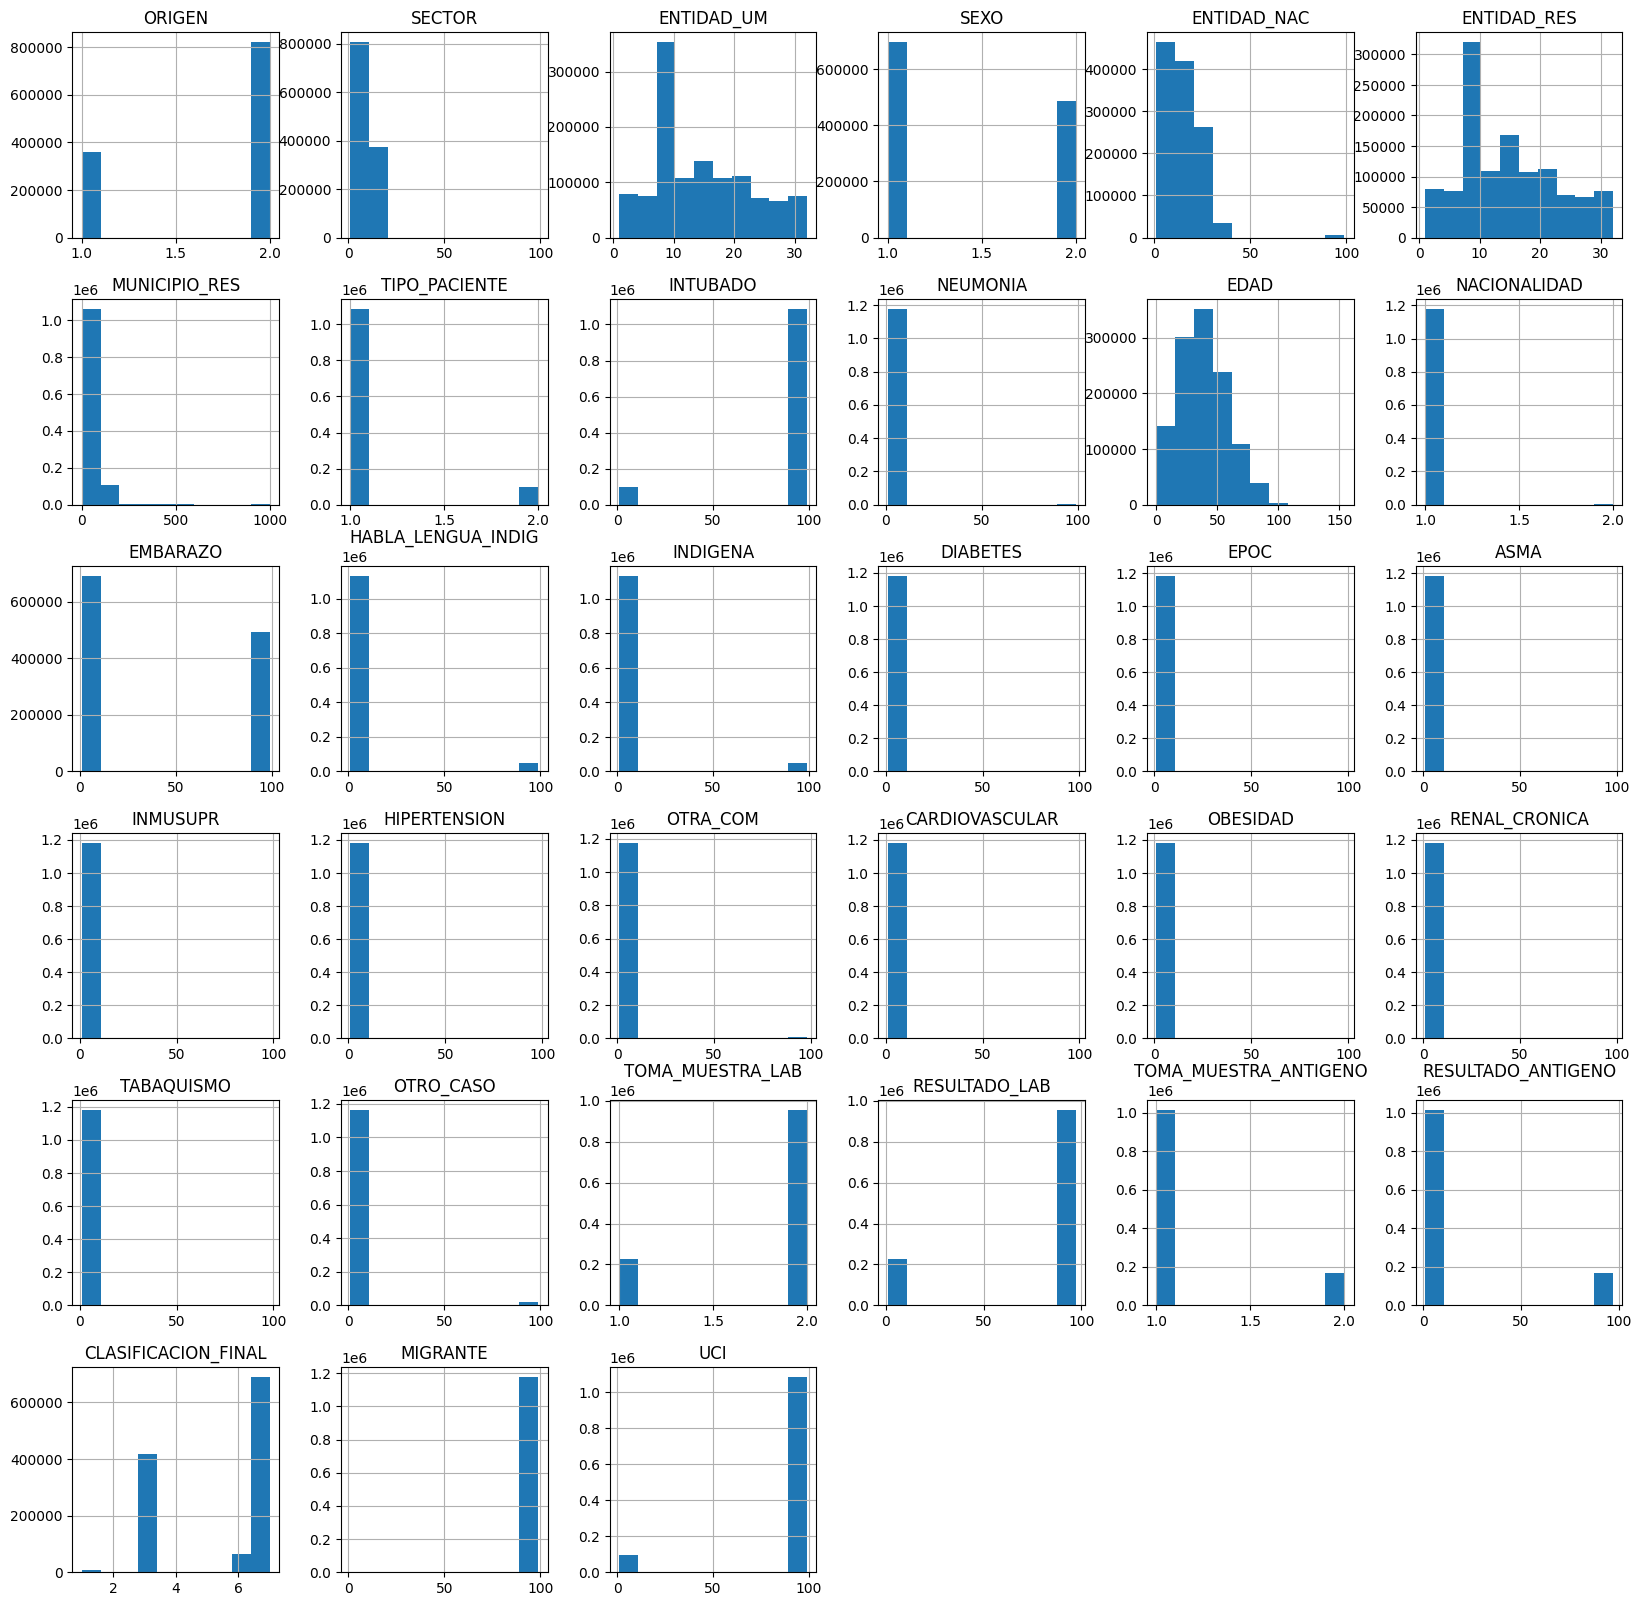

In [10]:
data.hist(figsize=(20,20));

By looking at the catalogs file provided for this dataset, it can be observed the following:

  -  Most of the variables in the dataset are "binary" type, with possible values 1 or 2, many of these variables have also options for "unknown/undertermined" states that are in the 90's range (97-99).

  -  There are a few variables where the most common value is "unknown/not applicable": *INTUBADO*, *RESULTADO_LAB*, *MIGRANTE* and *UCI*

  -  There is a variable showing abnormal values exceeding the acceptable range (typing issues?): *EDAD*.

Catalog information about the dataset variables:

- SECTOR                    Medical Sector (Red Cross, DIF, IMSS, State, etc.)                         1 - 13 / 99

- ENTIDAD_UM                State Identifier                        1 - 32


- ENTIDAD_NAC               Birthplace (State)                      1 - 32 / 99

- ENTIDAD_RES               State of Residence                      1 - 32

- MUNICIPIO_RES             Municipality of Residence               1 - 99

- EDAD                      Patient Age                             0 - 154


Several variables are binary type (Yes = 1 / No = 2).  

However the following categories could have been added:

    Not Applicable: 97
    Unknown: 98
    Not Specified: 99


"Binary" Variables:

- ORIGEN              Origin (From Medical Service Unit? Y/N/Not Specified)     1 - 2 / 99

- SEXO                      Gender Identifier (male/female)         1 (F) - 2 (M)

- TIPO_PACIENTE             Patient Type (Ambulatory/Hospitalized)  1 - 2 / 99

- NACIONALIDAD              Nationality (Mexican / Foreign)         1 - 2 / 99

- INTUBADO   Patient was intubated               

- NEUMONIA   Patient had neumonia                  

- EMBARAZO   Patient is pregnant

- HABLA_LENGUA_INDIG  Patient speaks an idigenous dialect

- INDIGENA   Patient is an indigenous

- DIABETES   Patient has diabetes

- EPOC       Patient has a Chronic obstructive pulmonary disease (COPD)

- ASMA       Patient has asma

- INMUSUPR   Patient has inmunonolgic system problems

- HIPERTENSION  Patient has hypertension

- OTRA_COM     Patient has other comorbidity (simultaneous presence of two or more diseases or medical conditions in a patient)

- CARDIOVASCULAR  Patient has cardiovascular problems

- OBESIDAD   Patient has obesity

- RENAL_CRONICA    Patient has liver problems

- TABAQUISMO   Patient is a smoker

- OTRO_CASO    Patient had contact with other sick people

- TOMA_MUESTRA_LAB   Patient had a blood test

- TOMA_MUESTRA_ANTIGENO  Patient had an antigen test

- MIGRANTE   Patient is a migrant

-  UCI   Patient was admitted in the ICU

Test Results variables:

- RESULTADO_LAB       Lab Test results (1:POSITIVE, 2:NEGATIVE, 3:PENDING, 4:NOT CORRECT, 97: NOT APPLICABLE)

- RESULTADO_ANTIGENO  Antigen Test Results (1:POSITIVE, 2:NEGATIVE, 97: NOT APPLICABLE)

Output Variable:

- CLASIFICACION_FINAL   Final Classification
  
    1: COVID Case Confirmed by Association

    2: COVID Case Confirmed by Medical Committe

    3: COVID Case Confirmed by Test Result
    
    4: Negative due to lack of evidence (no lab sample)

    5: Negative due to lack of evidence (lab sample processed)

    6: Suspect Case but no clear evidence

    7: Negative per sample lab result

#### Evaluating response variable *CLASIFICACION_FINAL*

In [11]:
data['CLASIFICACION_FINAL'].value_counts()

7    690493
3    419380
6     62970
1      7971
5      2122
4       162
2        26
Name: CLASIFICACION_FINAL, dtype: int64

**Observation:**  

Most of the data points fall within one of two classes: *7* COVID confirmed by test result (58%) or *3* Negative to COVID by test result (35%).

Those two classes represent 93% of the total of data samples.  These are the only diagnostics verified through a test.

The other classifications were made based on assumptions and medical expertise and could be subject to errors due to human judgement.

**Recommendation:**

   Eliminate from the dataset for training and evaluation all the classifications that are not *7* or *3*

   Create a new dataset *data_suspect* for all the other classifications for further evaluation.



In [12]:
#  Creating a new dataset 'data_suspect' for all classes different from 7 and 3
data_suspect=data.loc[(data['CLASIFICACION_FINAL']!= 7) & (data['CLASIFICACION_FINAL']!=3)]

# Dropping all rows with classes different from 7 and 3
values = [1, 2, 4, 5, 6]
data= data[data.CLASIFICACION_FINAL.isin(values) == False]
data.reset_index(inplace = True, drop = True)
data

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-10-31,a9c809,2,12,3,2,3,3,3,1,...,2,2,97,1,2,7,99,México,97,97
1,2023-10-31,7ced56,2,12,9,2,8,9,9,1,...,2,2,97,1,2,7,99,México,97,97
2,2023-10-31,e9cf4c,2,12,11,2,11,11,31,1,...,2,1,2,1,2,7,99,México,97,97
3,2023-10-31,c9a5ed,2,12,9,2,9,9,9,1,...,2,2,97,1,2,7,99,México,97,97
4,2023-10-31,cbecc9,2,6,5,1,5,5,28,1,...,2,2,97,1,2,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109868,2023-10-31,m00ee10,2,12,15,2,30,15,33,1,...,99,2,97,1,2,7,99,México,97,97
1109869,2023-10-31,m1cc581,2,3,15,1,20,15,999,1,...,99,2,97,1,2,7,99,México,97,97
1109870,2023-10-31,m0b0348,2,12,15,1,9,15,999,1,...,99,2,97,1,2,7,99,México,97,97
1109871,2023-10-31,m08f43c,2,3,15,2,15,15,999,1,...,99,2,97,1,2,7,99,México,97,97


#### Evaluating *INTUBADO* variable

In [13]:
data['INTUBADO'].value_counts()

97    1017612
2       87858
1        4196
99        207
Name: INTUBADO, dtype: int64

*Observations:*
Most of the values for *INTUBADO* variable are *97* (Not Applicable).  This condition is similar to state that patient was not intubated.

The second most common value is *2* (No)

A few cases have the values *1* (Yes) and *99* (Not specified)

*Recommendation:*

Change the rows with class *97* to *2* because it is the most likely condition.

Change the rows with class *99* to *0* to indicate this factor cannot be considered in the model.

In [14]:
data.loc[data['INTUBADO'] == 97, 'INTUBADO'] = 2
data.loc[data['INTUBADO'] == 99, 'INTUBADO'] = 0
data['INTUBADO'].value_counts()

2    1105470
1       4196
0        207
Name: INTUBADO, dtype: int64

#### Evaluating *UCI* variable

In [15]:
data['UCI'].value_counts()

97    1017612
2       88846
1        3208
99        207
Name: UCI, dtype: int64

**Observations:**
Most of the values for *UCI* variable are *97* (Not Applicable).  This condition is similar to condition where the patient was not admitted into ICU.

The second most common value is *2* (No)

A few cases have the values *1* (Yes) and *99* (Not specified)

**Recommendation:**

Change the rows with class *97* to *2* because it is the most likely condition.

Change the rows with class *99* to *0* to indicate this factor cannot be considered in the model.

In [16]:
data.loc[data['UCI'] == 97, 'UCI'] = 2
data.loc[data['UCI'] == 99, 'UCI'] = 0
data['UCI'].value_counts()

2    1106458
1       3208
0        207
Name: UCI, dtype: int64

#### Evaluating *RESULTADO_LAB* variable

In [17]:
data['RESULTADO_LAB'].value_counts()

97    891702
2     168591
1      43945
4       5635
Name: RESULTADO_LAB, dtype: int64

**Observations:**
Most of the values for *RESULTADO_LAB* variable are *97* (Not Applicable).  This condition is similar to condition where the patient did not have a lab test.

The second most common value is *2* (No)

A few cases have the values *1* (Yes) and *4* (Result not valid)

**Recommendation:**

Change the rows with class *97* to *2* because it is the most likely condition.

Change the rows with class *4* to *0* to indicate this factor cannot be considered in the model.

In [18]:
data.loc[data['RESULTADO_LAB'] == 97, 'RESULTADO_LAB'] = 2
data.loc[data['RESULTADO_LAB'] == 4, 'RESULTADO_LAB'] = 0
data['RESULTADO_LAB'].value_counts()

2    1060293
1      43945
0       5635
Name: RESULTADO_LAB, dtype: int64

#### Evaluating *RESULTADO_ANTIGENO* variable

In [19]:
data['RESULTADO_ANTIGENO'].value_counts()

2     615553
1     390895
97    103425
Name: RESULTADO_ANTIGENO, dtype: int64

**Observations:**
Most of the values for *RESULTADO_ANTIGENO* variable are *2*  (NEgative to COVID).

The second most common value is *1* (Positive to COVID)

Other cases have the value *97* (Not Applicable)

**Recommendation:**

Change the rows with class *97* to *0* to indicate this factor cannot be considered in the model.

In [20]:
data.loc[data['RESULTADO_ANTIGENO'] == 97, 'RESULTADO_ANTIGENO'] = 0
data['RESULTADO_ANTIGENO'].value_counts()

2    615553
1    390895
0    103425
Name: RESULTADO_ANTIGENO, dtype: int64

Evaluating SECTOR variable

In [21]:
data['SECTOR'].value_counts()

4     618770
12    330004
9      84868
6      51060
3      16471
5       2874
8       2640
13      1253
7        714
2        354
10       337
11       333
99       175
1         20
Name: SECTOR, dtype: int64

Most of the patients in the dataset are from the medical sectors *4* (IMSS) and *12* (SSA).  These two medical sectors represent over 85% of the reported cases.

There are a few cases identified as *99* (Unknown).  This class will be changed to *0* to indicate this factor cannot be considered in the model.

In [22]:
data.loc[data['SECTOR'] == 99, 'SECTOR'] = 0
data['SECTOR'].value_counts()

4     618770
12    330004
9      84868
6      51060
3      16471
5       2874
8       2640
13      1253
7        714
2        354
10       337
11       333
0        175
1         20
Name: SECTOR, dtype: int64

### Evaluating *ENTIDAD_NAC* variable





In [23]:
data['ENTIDAD_NAC'].value_counts()

9     291768
15    106730
11     64553
19     53743
21     41508
30     39016
20     35019
24     34383
14     29706
5      27253
16     26012
28     25801
12     25523
25     25506
22     24785
17     22449
26     22378
13     21338
2      21137
7      17617
27     16905
31     16615
1      16285
18     14531
8      14358
32     13731
29     13692
3      12875
6      10509
10     10329
23      5886
99      4482
4       3450
Name: ENTIDAD_NAC, dtype: int64

Most of the patients in the dataset are from the states *9* (Ciudad de Mexico) and *15* (Estado de Mexico).  These two states represent almost 36% of the reported cases.

There are a few cases identified as *99* (Unknown).  This class will be changed to *0* to indicate this factor cannot be considered in the model.

In [24]:
data.loc[data['ENTIDAD_NAC'] == 99, 'ENTIDAD_NAC'] = 0
data['ENTIDAD_NAC'].value_counts()

9     291768
15    106730
11     64553
19     53743
21     41508
30     39016
20     35019
24     34383
14     29706
5      27253
16     26012
28     25801
12     25523
25     25506
22     24785
17     22449
26     22378
13     21338
2      21137
7      17617
27     16905
31     16615
1      16285
18     14531
8      14358
32     13731
29     13692
3      12875
6      10509
10     10329
23      5886
0       4482
4       3450
Name: ENTIDAD_NAC, dtype: int64

#### Evaluating *NEUMONIA* variable

In [25]:
data['NEUMONIA'].value_counts()

2     1069951
1       34978
99       4944
Name: NEUMONIA, dtype: int64

**Observations:**

 Most of the values for *NEUMONIA* variable are 2 (No).

The second most common value is 1 (Yes)

Other cases have the value 99 (Unknown)

**Recommendation:**

Change the rows with class 99 to 0 to indicate this factor cannot be considered in the model.

In [26]:
data.loc[data['NEUMONIA'] == 99, 'NEUMONIA'] = 0
data['NEUMONIA'].value_counts()

2    1069951
1      34978
0       4944
Name: NEUMONIA, dtype: int64

#### Evaluating *EDAD* variable



In [27]:
data['EDAD'].value_counts()

29     26364
28     26308
30     25938
31     25804
27     25363
       ...  
121        2
116        1
115        1
141        1
125        1
Name: EDAD, Length: 123, dtype: int64

**Observations:**

 The values for *EDAD* variable have a mean of 38 and a standard deviation of 19.  The distribution has a Gaussian shape with a few outliers towards the high range.

 There are a few records showing abnormal ages over 100 years-old like 154, 141, 125 which are unlikely to be real values but, even if they were real, the datapoints could be considered outliers due to the extreme conditions caused by the age factor.

**Recommendation:**

Change all values over 100 to a fixed 100 value to reduce the trend towards high values.



In [28]:
data.loc[data['EDAD'] > 100, 'EDAD'] = 100
data['EDAD'].value_counts()

29    26364
28    26308
30    25938
31    25804
27    25363
      ...  
95      334
96      277
97      218
98      159
99      115
Name: EDAD, Length: 101, dtype: int64

#### Evaluating *EMBARAZO* variable

In [29]:
data['EMBARAZO'].value_counts()

2     628614
97    456253
1      19742
98      5259
99         5
Name: EMBARAZO, dtype: int64

**Observations:**

Most of the values for *EMBARAZO* variable are *2* (No).

The second most common value is *97* (Not Applicable).  This rating was assigned because the patient was male.

A few cases have the values *1* (Yes), *98* (Unknown) and *99* (Not Specified)

**Recommendation:**

Change the rows with class *97* to *0* because being males, the pregnat factor does not apply.

Change the rows with classes *98* and *99* to 0 to indicate this factor cannot be considered in the model.

In [30]:
data.loc[data['EMBARAZO'] == 97, 'EMBARAZO'] = 0
data.loc[(data['EMBARAZO'] == 98) | (data['EMBARAZO'] == 99), 'EMBARAZO'] = 0
data['EMBARAZO'].value_counts()

2    628614
0    461517
1     19742
Name: EMBARAZO, dtype: int64

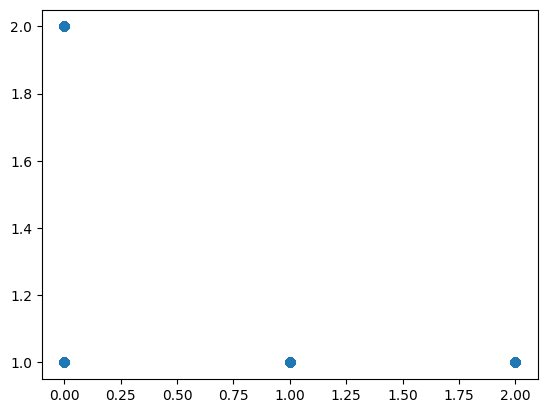

In [31]:
plt.scatter(data.EMBARAZO, data.SEXO)

Confirming all Males have a class *0* in *EMBARAZO*

#### Evaluating *HABLA_LENGUA_INDIG* variable

In [32]:
data['HABLA_LENGUA_INDIG'].value_counts()

2     1056573
99      46778
1        6522
Name: HABLA_LENGUA_INDIG, dtype: int64

**Observations:**

Most of the values for *HABLA_LENGUA_INDIG* variable are *2* (No).

The second most common value is *99* (Unknown).  

A few cases have the values *1* (Yes)

**Recommendation:**

Change the rows with class *99* to 0 to indicate this factor cannot be considered in the model.

In [33]:
data.loc[data['HABLA_LENGUA_INDIG'] == 99, 'HABLA_LENGUA_INDIG'] = 0
data['HABLA_LENGUA_INDIG'].value_counts()

2    1056573
0      46778
1       6522
Name: HABLA_LENGUA_INDIG, dtype: int64

#### Evaluating *INDIGENA* variable

In [34]:
data['INDIGENA'].value_counts()

2     1055971
99      45527
1        8375
Name: INDIGENA, dtype: int64

**Observations:**

Most of the values for *INDIGENA* variable are *2* (No).

The second most common value is *99* (Unknown).  

A few cases have the values *1* (Yes)

**Recommendation:**

Change the rows with class *99* to 0 to indicate this factor cannot be considered in the model.

In [35]:
data.loc[data['INDIGENA'] == 99, 'INDIGENA'] = 0
data['INDIGENA'].value_counts()

2    1055971
0      45527
1       8375
Name: INDIGENA, dtype: int64

#### Evaluating *EPOC* variable

In [36]:
data['EPOC'].value_counts()

2     1097687
1       11220
98        966
Name: EPOC, dtype: int64

**Observations:**

Most of the values for *EPOC* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [37]:
data.loc[data['EPOC'] == 98, 'EPOC'] = 0
data['EPOC'].value_counts()

2    1097687
1      11220
0        966
Name: EPOC, dtype: int64

#### Evaluating *ASMA* variable

In [38]:
data['ASMA'].value_counts()

2     1082477
1       26478
98        918
Name: ASMA, dtype: int64

**Observations:**

Most of the values for *EPOC* variable are *2* (No).

The second most common value is *1* (Yes).

A few cases have the value *98* (Unknown)

**Recommendation:**

Change the rows with class *98* to *0* to indicate this factor cannot be considered in the model.

In [39]:
data.loc[data['ASMA'] == 98, 'ASMA'] = 0
data['ASMA'].value_counts()

2    1082477
1      26478
0        918
Name: ASMA, dtype: int64

#### Evaluating *INMUSPR* variable

In [40]:
data['INMUSUPR'].value_counts()

2     1098648
1       10332
98        893
Name: INMUSUPR, dtype: int64

**Observations:**

Most of the values for *INMUSPR* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [41]:
data.loc[data['INMUSUPR'] == 98, 'INMUSUPR'] = 0
data['INMUSUPR'].value_counts()

2    1098648
1      10332
0        893
Name: INMUSUPR, dtype: int64

#### Evaluating *HIPERTENSION* variable

In [42]:
data['HIPERTENSION'].value_counts()

2     984682
1     124258
98       933
Name: HIPERTENSION, dtype: int64

**Observations:**

Most of the values for *HIPERTENSION* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [43]:
data.loc[data['HIPERTENSION'] == 98, 'HIPERTENSION'] = 0
data['HIPERTENSION'].value_counts()

2    984682
1    124258
0       933
Name: HIPERTENSION, dtype: int64

#### Evaluating *OTRA_COM* variable

In [44]:
data['OTRA_COM'].value_counts()

2     1082873
1       19948
98       7052
Name: OTRA_COM, dtype: int64

**Observations:**

Most of the values for *OTRA_COM* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [45]:
data.loc[data['OTRA_COM'] == 98, 'OTRA_COM'] = 0
data['OTRA_COM'].value_counts()

2    1082873
1      19948
0       7052
Name: OTRA_COM, dtype: int64

#### Evaluating *CARDIOVASCULAR* variable

In [46]:
data['CARDIOVASCULAR'].value_counts()

2     1094408
1       14538
98        927
Name: CARDIOVASCULAR, dtype: int64

**Observations:**

Most of the values for *CARDIOVASCULAR* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [47]:
data.loc[data['CARDIOVASCULAR'] == 98, 'CARDIOVASCULAR'] = 0
data['CARDIOVASCULAR'].value_counts()

2    1094408
1      14538
0        927
Name: CARDIOVASCULAR, dtype: int64

#### Evaluating *OBESIDAD* variable

In [48]:
data['OBESIDAD'].value_counts()

2     1022573
1       86465
98        835
Name: OBESIDAD, dtype: int64

**Observations:**

Most of the values for *OBESIDAD* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [49]:
data.loc[data['OBESIDAD'] == 98, 'OBESIDAD'] = 0
data['OBESIDAD'].value_counts()

2    1022573
1      86465
0        835
Name: OBESIDAD, dtype: int64

#### Evaluating *RENAL_CRONICA* variable

In [50]:
data['RENAL_CRONICA'].value_counts()

2     1096260
1       12688
98        925
Name: RENAL_CRONICA, dtype: int64

**Observations:**

Most of the values for *RENAL_CRONICA* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [51]:
data.loc[data['RENAL_CRONICA'] == 98, 'RENAL_CRONICA'] = 0
data['RENAL_CRONICA'].value_counts()

2    1096260
1      12688
0        925
Name: RENAL_CRONICA, dtype: int64

#### Evaluating *TABAQUISMO* variable

In [52]:
data['TABAQUISMO'].value_counts()

2     1062640
1       46261
98        972
Name: TABAQUISMO, dtype: int64

**Observations:**

Most of the values for *TABAQUISMO* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [53]:
data.loc[data['TABAQUISMO'] == 98, 'TABAQUISMO'] = 0
data['TABAQUISMO'].value_counts()

2    1062640
1      46261
0        972
Name: TABAQUISMO, dtype: int64

#### Evaluating *OTRO_CASO* variable

In [54]:
data['OTRO_CASO'].value_counts()

2     944215
1     148912
99     16746
Name: OTRO_CASO, dtype: int64

**Observations:**

Most of the values for *OTRO_CASO* variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 99 (Not Specified)

**Recommendation:**

Change the rows with class 99 to 0 to indicate this factor cannot be considered in the model.

In [55]:
data.loc[data['OTRO_CASO'] == 99, 'OTRO_CASO'] = 0
data['OTRO_CASO'].value_counts()

2    944215
1    148912
0     16746
Name: OTRO_CASO, dtype: int64

#### Evaluating *DIABETES* variable

In [56]:
data['DIABETES'].value_counts()

2     1019265
1       89550
98       1058
Name: DIABETES, dtype: int64

**Observations:**

Most of the values for *DIABETES variable are 2 (No).

The second most common value is 1 (Yes).

A few cases have the value 98 (Unknown)

**Recommendation:**

Change the rows with class 98 to 0 to indicate this factor cannot be considered in the model.

In [57]:
data.loc[data['DIABETES'] == 98, 'DIABETES'] = 0
data['DIABETES'].value_counts()

2    1019265
1      89550
0       1058
Name: DIABETES, dtype: int64


#### Evaluating *MIGRANTE* variable

In [58]:
data['MIGRANTE'].value_counts()

99    1106350
2        2246
1        1277
Name: MIGRANTE, dtype: int64

*Observations:*

Most of the values for *MIGRANTE* variable are 99 (Unknown).  This represents almost 99.7% of the total of registers.

This condition means that the data in this column is not significant for any classification purposes

*Recommendation:*

Eliminate *MIGRANTE* column from the dataset because the amout of significant information is almost zero.

In [59]:
data.drop('MIGRANTE', axis=1, inplace=True)
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

#### New Histogram Distributions After Cleaning Variables

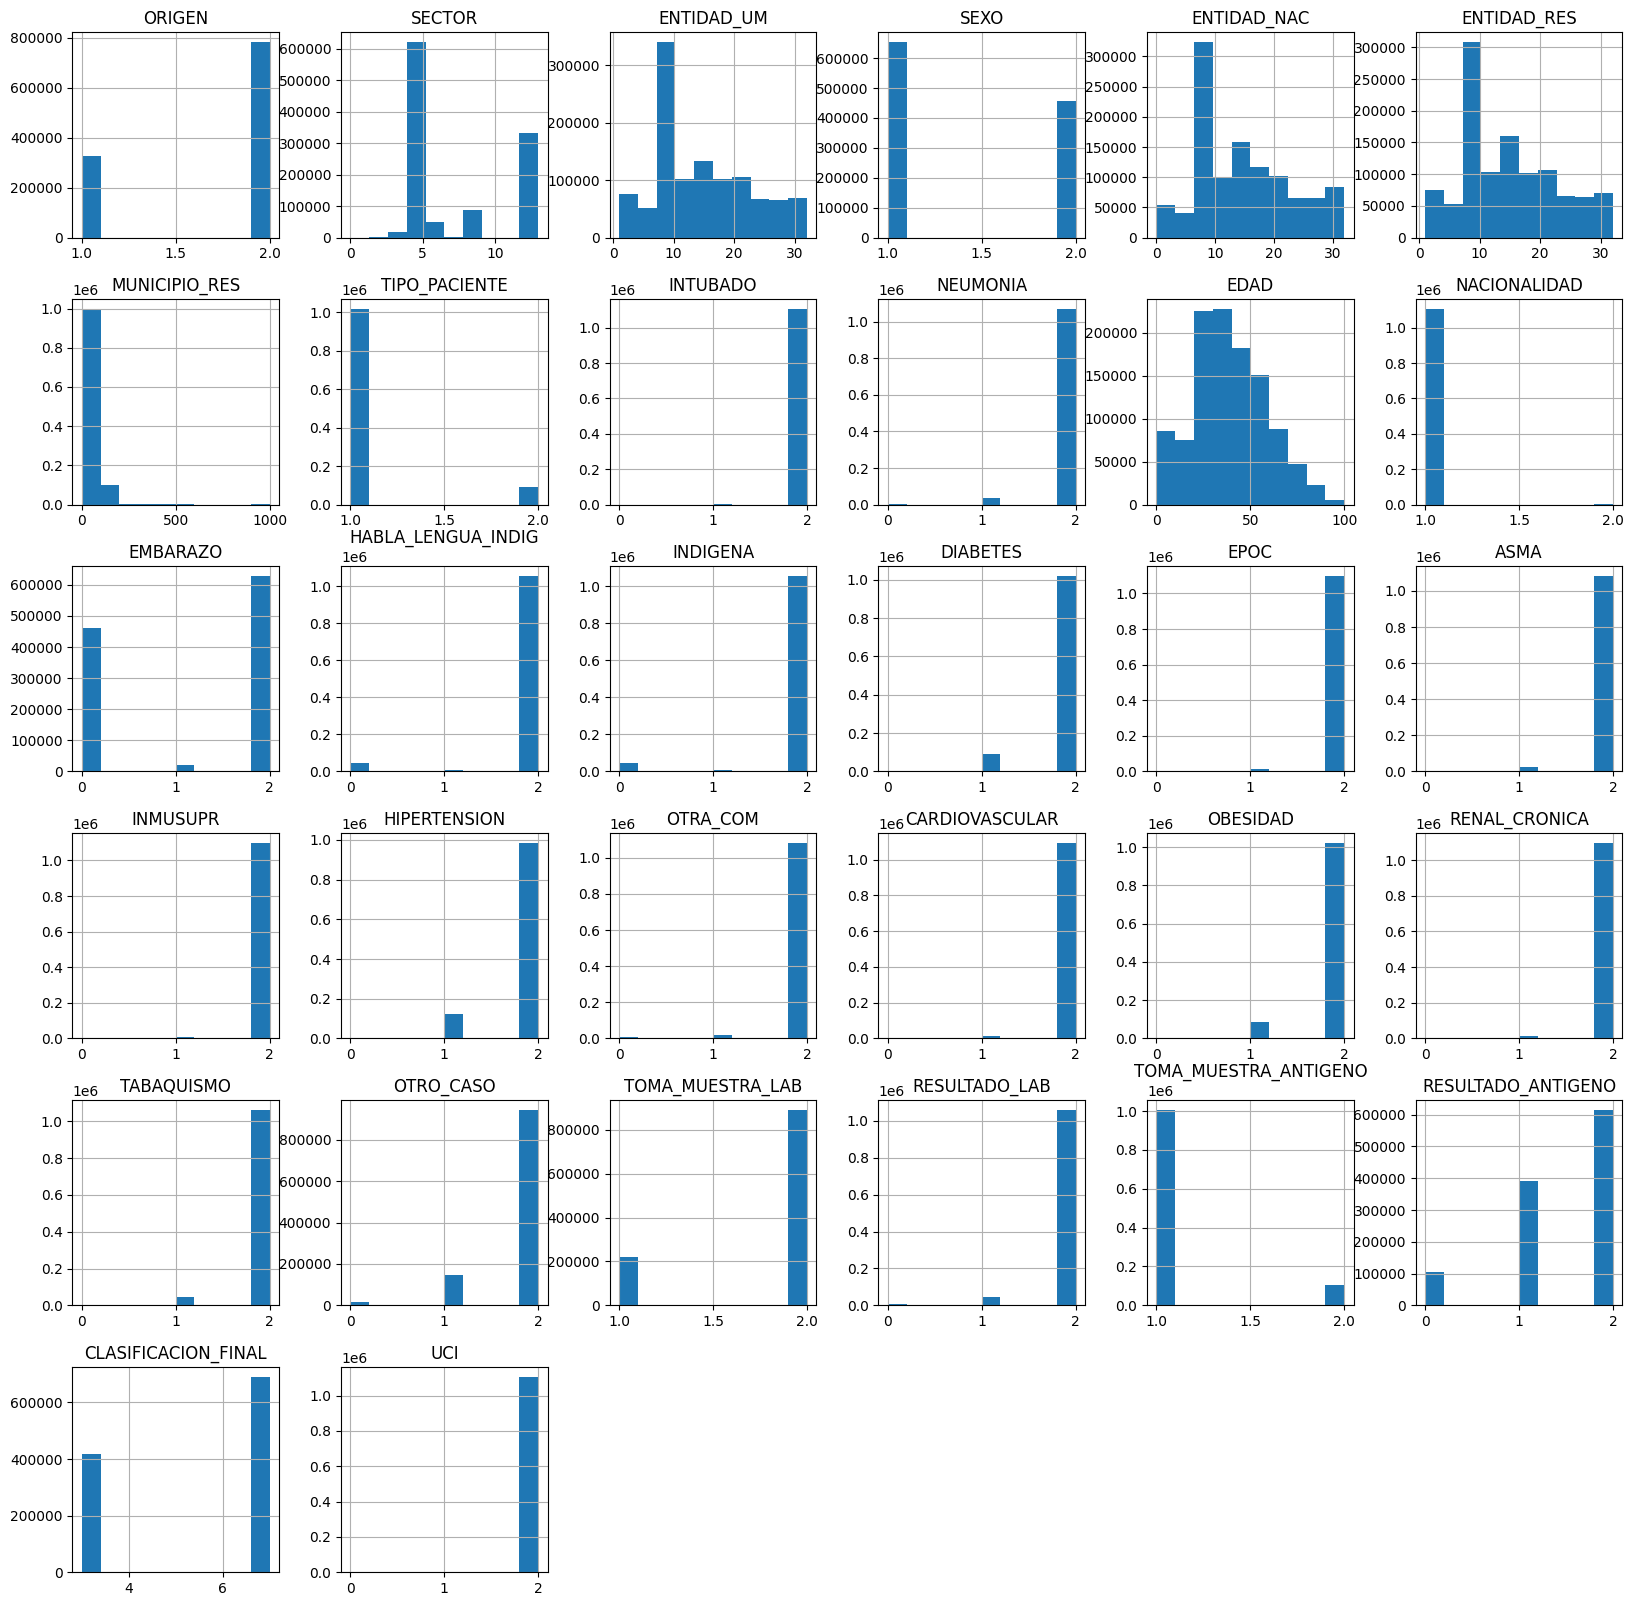

In [60]:
data.hist(figsize=(20,20));

####  Checking Correlation Between Variables

<ipython-input-61-8810b4c33236>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True , cmap ='magma' )


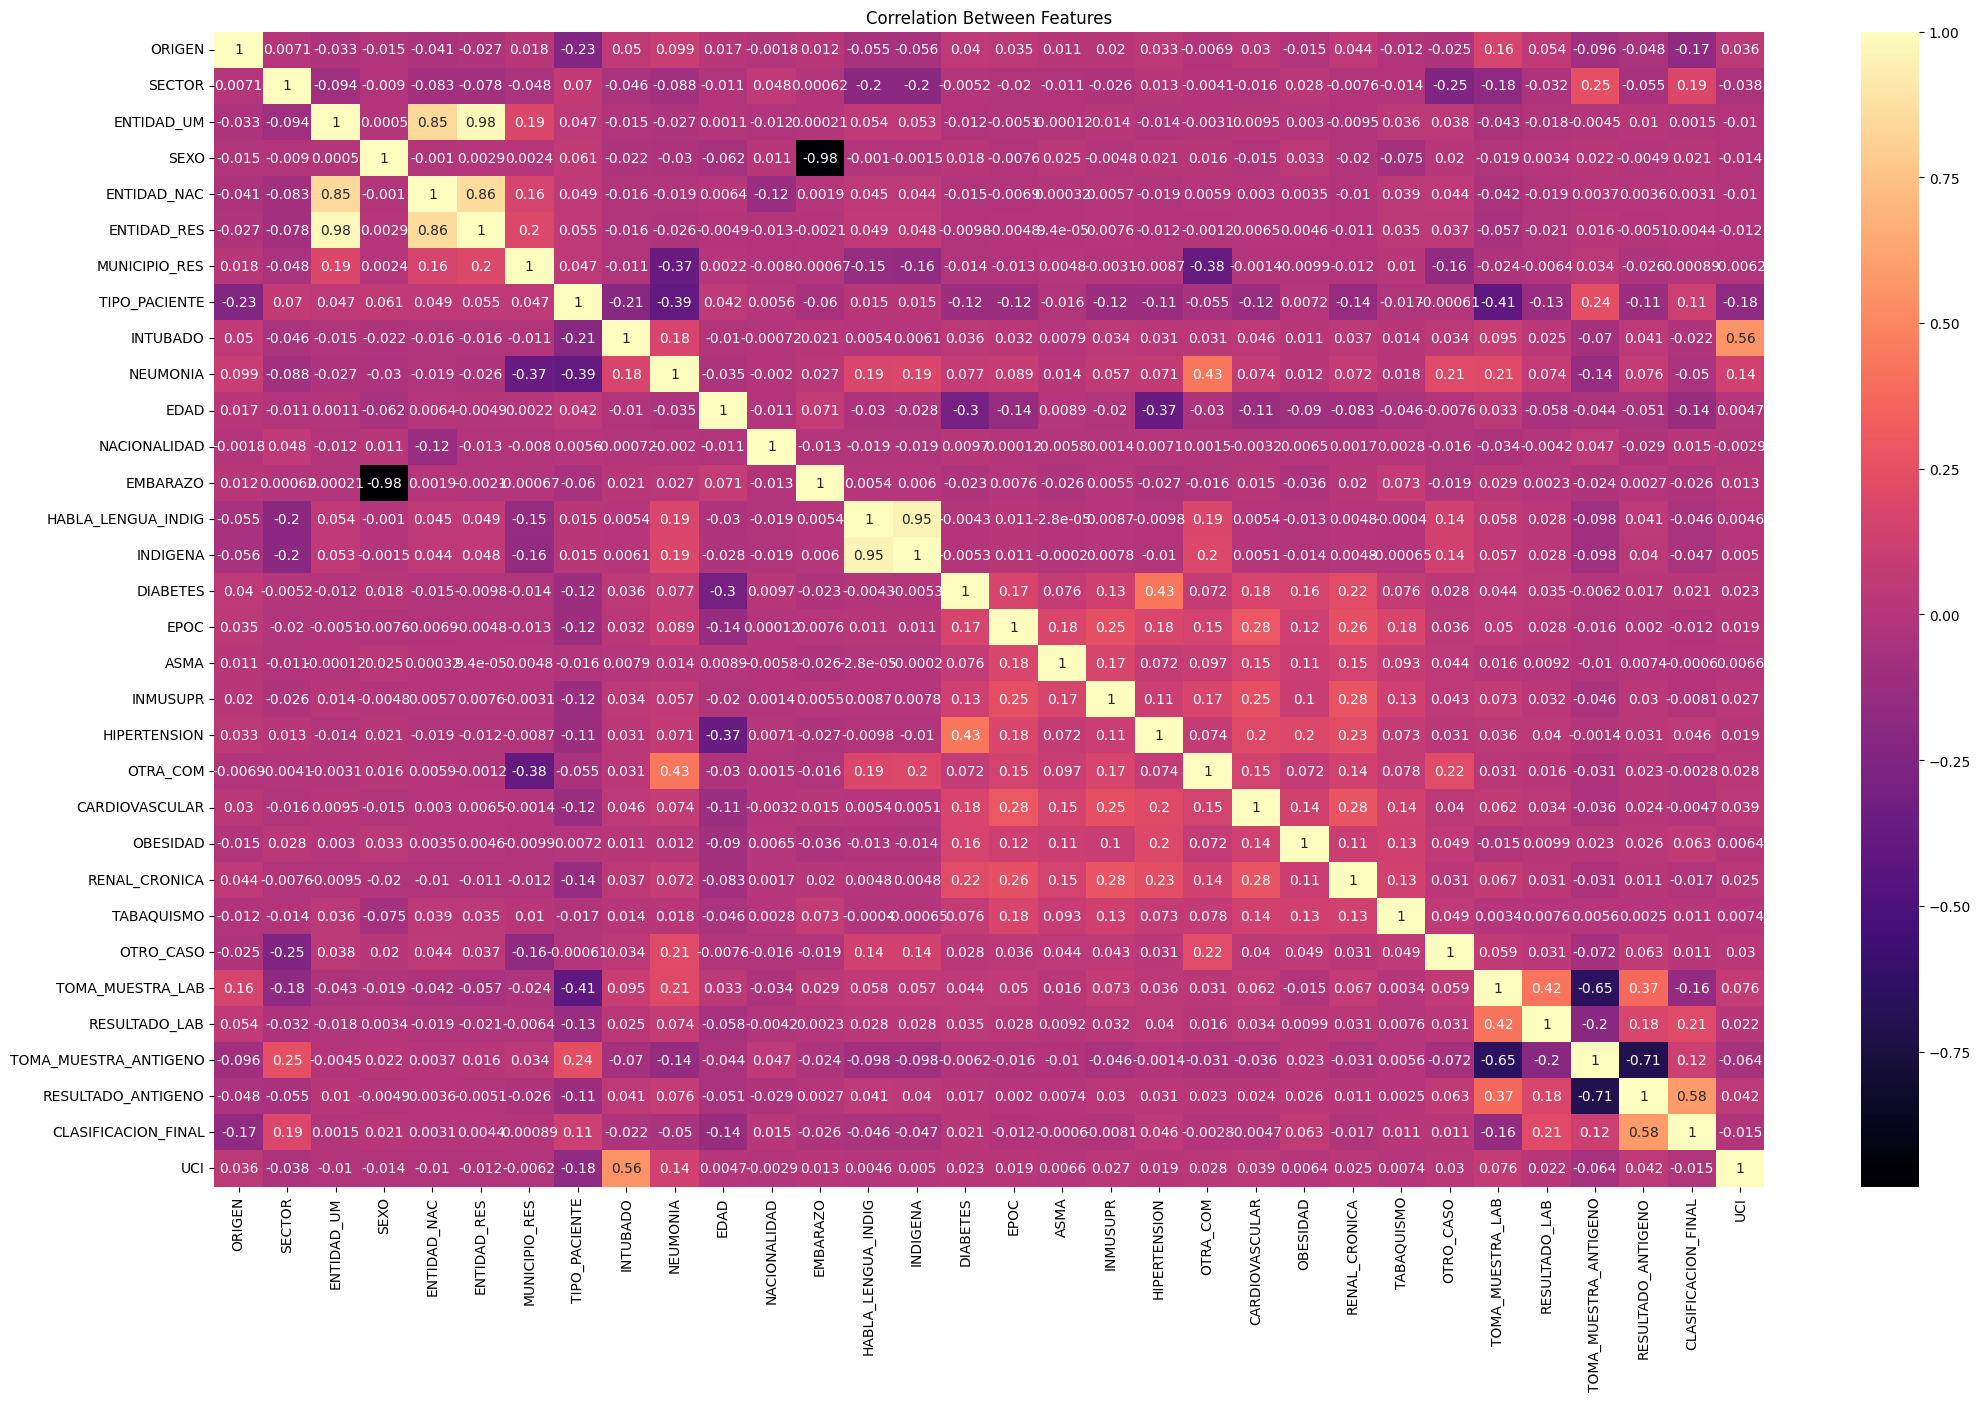

In [61]:
# Correlation Heat map

plt.figure(figsize = (25,15))
sns.heatmap(data.corr(),annot=True , cmap ='magma' )
plt.title("Correlation Between Features");

**Observations:**

A significant negative correlation (-0.98) is observed between *SEXO* and *EMBARAZO* because all men will have a not applicable level for this factor.

Another important negative correlation (-0.71) is observed between *TOMA_MUESTRA_ANTIGENO* and *RESULTADO_ANTIGENO* because all antigen samples taken will have an antigen result regardless of being positive or negative.

The variables *TOMA_MUESTRA_LAB* and *RESULTADO_LAB* have another important negative correlation (-0.65) because all lab samples taken will have a lab result regardless of being positive, negative or inconclusive.

Important positive correlation (0.98) is observed between *ENTIDAD_RES* and *ENTIDAD_UM* because is very likely that someone borned in a certain state will still live there and therefore will go to a medical unit in the same state.

Another high positive correlation (0.95) exists between *INDIGENA* and *HABLA_LENGUA_INDIG* becuase if a person is indigenou, it is very likely that they will speak an indigenous dialect.

There is a significant positive correlation (0.86) between *ENTIDAD_NAC* and *ENTIDAD_RES* because in most of the cases the people born in a certain state will remain living there.

Another significant correlation (0.85) exists between *ENTIDAD_NAC* and *ENTiDAD_UM* because a person being born in a certain state, is very likely to remain there and get medical attention in that same state.

####  Determining Variables to Use in the Model

There are certain variables that are not expected to have any significant impact in the outcome of the response variable:

-  The medical unit or medical agency where the patient receives attention should not be a contributor to whether the patient gets sick or not.  Therefore *SECTOR* and *ENTIDAD_UM* variables are being removed.

-  The municipality or state where the person resides or was born might not be an important factor to define if the person gets COVID or not. The variables *MUNICIPIO_RES*, *ENTIDAD_RES* and *ENTIDAD_NAC* can be removed from the model.

-  Being an indigenous person or speaking an indigenous language or not should not be a factor to determine if a person gets sick or not.  In this case, *HABLA_LENGUA_INDIG* and *INDIGENA* variables can be removed.

-  The register ID provided to the patient will not have an effect on wheter that person has COVID or not.  Therefore *ID_REGISTRO* variable will be removed.

-  Whether a patient is Mexican or foreigner, whether it was born in MExico or any other country and whether he is from a certain country or other, would not have a significant effect on whether that person gets ill.  The variables *ORIGEN*, *PAIS_NACIONALIDAD*,*PAIS_ORIGEN* and *NACIONALIDAD*  will be removed.






In [62]:
# Creating a new dataframe to eliminate columns not required
df=data

df = df.drop(columns=['SECTOR','MUNICIPIO_RES','HABLA_LENGUA_INDIG','ID_REGISTRO','ORIGEN','PAIS_NACIONALIDAD','PAIS_ORIGEN','INDIGENA','ENTIDAD_UM','ENTIDAD_NAC','NACIONALIDAD','ENTIDAD_RES'])
df.columns

Index(['FECHA_ACTUALIZACION', 'SEXO', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'UCI'],
      dtype='object')

#### Converting columns with date information in to date type

In [63]:
#  Converting columns with date information to date type variables
df['FECHA_ACTUALIZACION']=pd.to_datetime(df['FECHA_ACTUALIZACION'])
df['FECHA_INGRESO']=pd.to_datetime(df['FECHA_INGRESO'])
df['FECHA_SINTOMAS']=pd.to_datetime(df['FECHA_SINTOMAS'])
df['FECHA_DEF']=pd.to_datetime(df['FECHA_DEF'],errors='coerce')

In [64]:
#  Converting values on 'TIPO_PACIENTE' to string
for col in ['TIPO_PACIENTE']:
  df[col]=df[col].astype(str)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109873 entries, 0 to 1109872
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   FECHA_ACTUALIZACION    1109873 non-null  datetime64[ns]
 1   SEXO                   1109873 non-null  int64         
 2   TIPO_PACIENTE          1109873 non-null  object        
 3   FECHA_INGRESO          1109873 non-null  datetime64[ns]
 4   FECHA_SINTOMAS         1109873 non-null  datetime64[ns]
 5   FECHA_DEF              8069 non-null     datetime64[ns]
 6   INTUBADO               1109873 non-null  int64         
 7   NEUMONIA               1109873 non-null  int64         
 8   EDAD                   1109873 non-null  int64         
 9   EMBARAZO               1109873 non-null  int64         
 10  DIABETES               1109873 non-null  int64         
 11  EPOC                   1109873 non-null  int64         
 12  ASMA                   11098

#### Using *LabelEncoder()* method to encode values on variable *TIPO_PACIENTE* and *SEXO*

In [66]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()


for col in ['TIPO_PACIENTE','SEXO']:
  df[col]=le.fit_transform(df[col])


#### Use the Dates to Calculates Days Elapsed Between Key Events

In [67]:
# crear caracteristicas apartir de las fechas
df['DIAS_DEFUNCION']=(df['FECHA_ACTUALIZACION']- df['FECHA_DEF']).dt.days
df['DIAS_HOSPITALIZACION']=(df['FECHA_ACTUALIZACION']- df['FECHA_INGRESO']).dt.days
df['DIAS_SINTOMAS']=(df['FECHA_ACTUALIZACION']- df['FECHA_SINTOMAS']).dt.days


# Red NUERONAL REVISAR ESTO
df['DIAS_DEFUNCION'] = df['DIAS_DEFUNCION'].apply(lambda x: 0 if x < 0 else x)

#### Eliminating Date Columns Not Required Anymore

In [68]:
df = df.drop(columns=['FECHA_ACTUALIZACION', 'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF','DIAS_DEFUNCION'])

X=df.drop(columns=['CLASIFICACION_FINAL'])
y=df['CLASIFICACION_FINAL']

#### Creating the Test and Train Files

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Using a Random Forest Classifier to create the Model and Check Predictions

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf=RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00     83856
           7       1.00      1.00      1.00    138119

    accuracy                           1.00    221975
   macro avg       1.00      1.00      1.00    221975
weighted avg       1.00      1.00      1.00    221975



Predictions look excellent with an accuracy, precision and recall of 1.

The model has very good predictions because it includes the information about antigen and lab testing results which are linked directly with the final diagnosis.

#### Using cuML to Accelerate the Model Fitting and Predictions Through GPU processing

In [71]:
import cuml
from cuml.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf=RandomForestClassifier(random_state=42)
#
X_train=X_train.astype('float32')
y_train=y_train.astype('float32')

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


              precision    recall  f1-score   support

           3       0.99      1.00      1.00     83856
           7       1.00      1.00      1.00    138119

    accuracy                           1.00    221975
   macro avg       1.00      1.00      1.00    221975
weighted avg       1.00      1.00      1.00    221975



#### Running Two Models: Random Forest Classifier and K-Neighbors and Comparing their Performance using cuML

In [72]:
import cuml
from cuml.ensemble import RandomForestClassifier
from cuml.neighbors import KNeighborsClassifier


cuml_RFC=RandomForestClassifier(random_state=42)
cuml_KNC=KNeighborsClassifier()

classifiers=[
    {
        'Random Forest',cuml_RFC
    },
    {
        'KNN',cuml_KNC
    }
]


for name,clf in classifiers:
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f'Modelo resultados')
  print(classification_report(y_test,y_pred))




/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


Modelo resultados
              precision    recall  f1-score   support

           3       0.99      1.00      1.00     83856
           7       1.00      1.00      1.00    138119

    accuracy                           1.00    221975
   macro avg       1.00      1.00      1.00    221975
weighted avg       1.00      1.00      1.00    221975

Modelo resultados
              precision    recall  f1-score   support

           3       0.94      0.88      0.91     83856
           7       0.93      0.97      0.95    138119

    accuracy                           0.94    221975
   macro avg       0.94      0.92      0.93    221975
weighted avg       0.94      0.94      0.93    221975



####  Creating a Function to Use UTF-8 as Preferred Encoding

In [73]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

####  Installing Gradio to Create an Interactive App for the Model

In [74]:
!pip install kaleido
!pip install openai
!pip install cohere
!pip install tiktoken
!pip install gradio

In [75]:
import gradio as gr
import pandas as pd
import numpy as np

#  Creating a function that receives the input variables and returns the prediction
def predict(sexo, tipo_paciente, intubado, neumonia, edad, embarazo,
             diabetes, epoc, asma, inmusupr,
            hipertension, otra_com, cardiovascular, obesidad,
            renal_cronica, tabaquismo, otro_caso, toma_muestra_lab,
            resultado_lab, toma_muestra_antigeno, resultado_antigeno,
           uci, dias_hospitalizacion, dias_sintomas):
    # Crea un DataFrame con los valores de entrada
    input_data = pd.DataFrame([[
        sexo, tipo_paciente, intubado, neumonia, edad, embarazo,
       diabetes, epoc, asma, inmusupr,
        hipertension, otra_com, cardiovascular, obesidad,
        renal_cronica, tabaquismo, otro_caso, toma_muestra_lab,
        resultado_lab, toma_muestra_antigeno, resultado_antigeno, uci, dias_hospitalizacion, dias_sintomas
        ]], columns=[
        'SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'EDAD', 'EMBARAZO','DIABETES', 'EPOC',
        'ASMA', 'INMUSUPR','HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD','RENAL_CRONICA',
        'TABAQUISMO', 'OTRO_CASO', 'TOMA_MUESTRA_LAB','RESULTADO_LAB', 'TOMA_MUESTRA_ANTIGENO',
        'RESULTADO_ANTIGENO','UCI', 'DIAS_HOSPITALIZACION', 'DIAS_SINTOMAS'])

    prediction = clf.predict(input_data)
    if prediction[0] == 3:
      diagnostic="POSITIVO COVID 3"
    else:
      diagnostic="NEGATIVO COVID 7"
    return diagnostic




gr.Row
inputs = [
    gr.Radio(choices=[0, 1], label='Sexo'),
    gr.Radio(choices=[0, 1], label='Tipo de Paciente'),
    gr.Radio(choices=[0, 1, 2], label='Intubado'),
    gr.Radio(choices=[0, 1, 2], label='Neumonía'),
    gr.Slider(minimum=0, maximum=100, value=30, label='Edad'),
    gr.Radio(choices=[0, 1, 2], label='Embarazo'),
    gr.Radio(choices=[0, 1, 2], label='Diabetes'),
    gr.Radio(choices=[0, 1, 2], label='EPOC'),
    gr.Radio(choices=[0, 1, 2], label='Asma'),
    gr.Radio(choices=[0, 1, 2], label='Inmunosupresión'),
    gr.Radio(choices=[0, 1, 2], label='Hipertensión'),
    gr.Radio(choices=[0, 1, 2], label='Otra Comorbilidad'),
    gr.Radio(choices=[0, 1, 2], label='Cardiovascular'),
    gr.Radio(choices=[0, 1, 2], label='Obesidad'),
    gr.Radio(choices=[0, 1, 2], label='Enfermedad Renal Crónica'),
    gr.Radio(choices=[0, 1, 2], label='Tabaquismo'),
    gr.Radio(choices=[0, 1, 2], label='Contacto con otro caso'),
    gr.Radio(choices=[1, 2], label='Toma de muestra de laboratorio'),
    gr.Radio(choices=[0, 1, 2], label='Resultado de laboratorio'),
    gr.Radio(choices=[1, 2], label='Toma de muestra de antígeno'),
    gr.Radio(choices=[0, 1, 2], label='Resultado de antígeno'),
    gr.Radio(choices=[0, 1, 2], label='UCI'),
    gr.Number(label='Días de Hospitalización',value=0),
    gr.Number(label='Días con Síntomas',value=0),
]

# Crear componente de salida para Gradio
outputs = gr.Textbox(label="Predicción")

# Crear la interfaz de Gradio
demo = gr.Interface(fn=predict, inputs=inputs, outputs=outputs)

# Ejecutar la aplicación web
if __name__ == "__main__":
    demo.launch(show_api=False,debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://834a068e223af93b1a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://834a068e223af93b1a.gradio.live
